In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
df=pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv')

In [93]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [94]:
df.shape

(1000, 40)

In [96]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [97]:
df.drop('_c39',axis=1,inplace=True)

In [98]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [99]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [100]:
# only 2 categories present in the target column so its classification model building problem
df['fraud_reported'].nunique()

2

In [101]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [102]:
# class imbalance present 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [36]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [103]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [104]:
# sort categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns :',categorical_col)
print('\n')
#contineous columns
contineous_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        contineous_col.append(i)
print('contineous column :',contineous_col)
print('\n')

categorical columns : ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


contineous column : ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']




In [105]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [106]:
df['policy_bind_date'].nunique()

951

In [107]:
# date column is object datatype change to date 
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month']=df['policy_bind_date'].apply(lambda x:x.month)
df['Day']=df['policy_bind_date'].apply(lambda x:x.day)

In [108]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,6,27
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,6,6


In [109]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [110]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Month,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,6.559000,15.448000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,3.391758,8.850176
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,4.000000,8.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,7.000000,16.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,9.000000,23.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,12.000000,31.000000


In [ ]:
# data analysis we see no invalid no
# each column count is same 
# target variable is categorical data so its classification model 
# duplicate rows removed
# each column datatype is correct according to the data present 

In [111]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

N    753
Y    247
Name: fraud_reported, dtype: int64


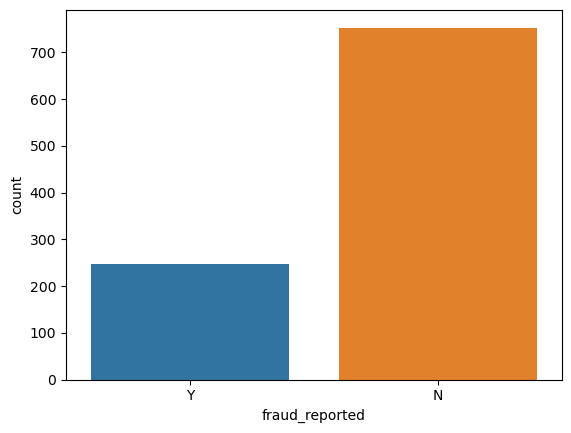

In [46]:
# visualise target count
ax=sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


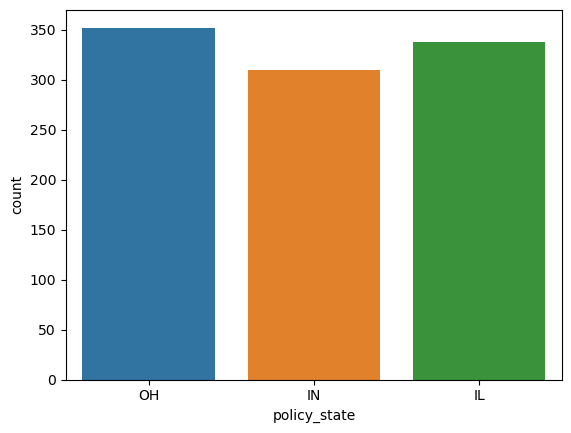

In [47]:
# fraud reported count for 'no' is higher 
# visualise policy state count
ax=sns.countplot(x='policy_state',data=df)
print(df['policy_state'].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


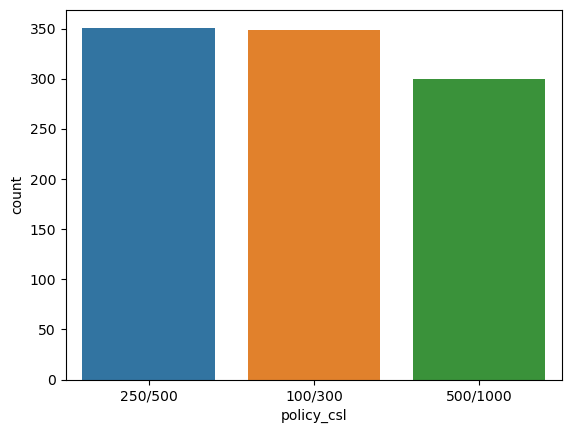

In [48]:
# no much deference in plocy state counts 
# visualise policy csl
ax=sns.countplot(x='policy_csl',data=df)
print(df['policy_csl'].value_counts())

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


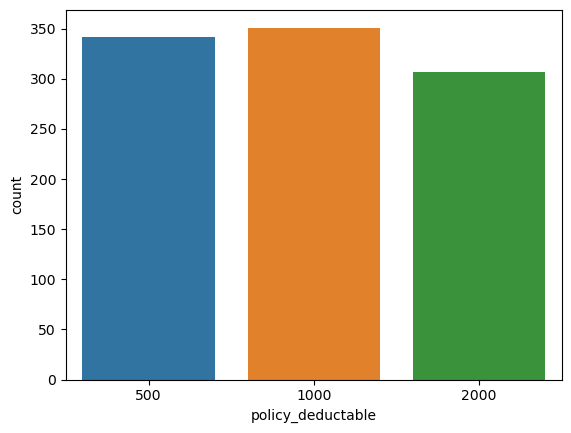

In [49]:
# no much deference in plocy csl counts 
# visualise policy deductable
ax=sns.countplot(x='policy_deductable',data=df)
print(df['policy_deductable'].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


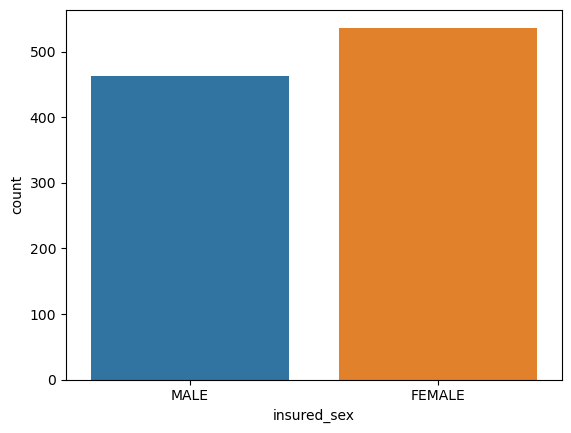

In [50]:
# no much deference in plocy deductable counts 
# visualise policy sex
ax=sns.countplot(x='insured_sex',data=df)
print(df['insured_sex'].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


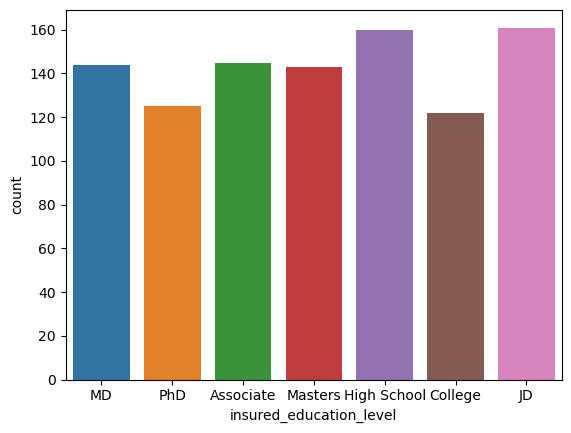

In [51]:
# female count higher than male count
# visualise insured education level
ax=sns.countplot(x='insured_education_level',data=df)
print(df['insured_education_level'].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


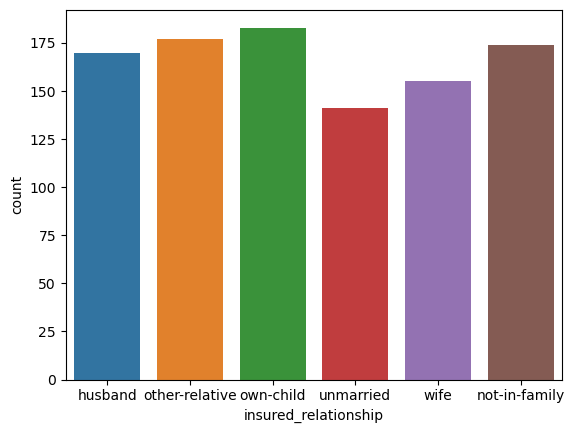

In [52]:
# college count is lesser and JD count is higher
# visualise  count of insured_relationship
ax=sns.countplot(x='insured_relationship',data=df)
print(df['insured_relationship'].value_counts())


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


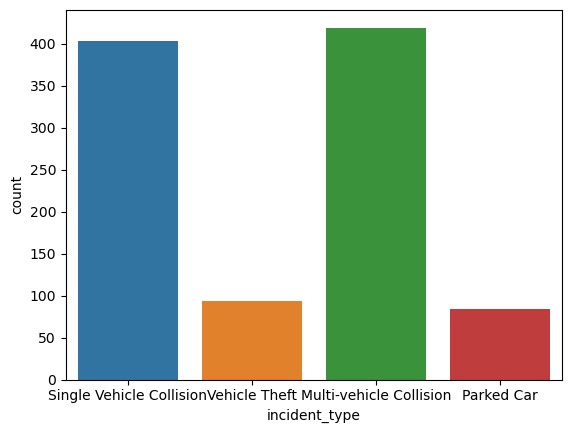

In [53]:
# unmarried count is less and own child count is higher
# visualise count of incident_type
ax=sns.countplot(x='incident_type',data=df)
print(df['incident_type'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


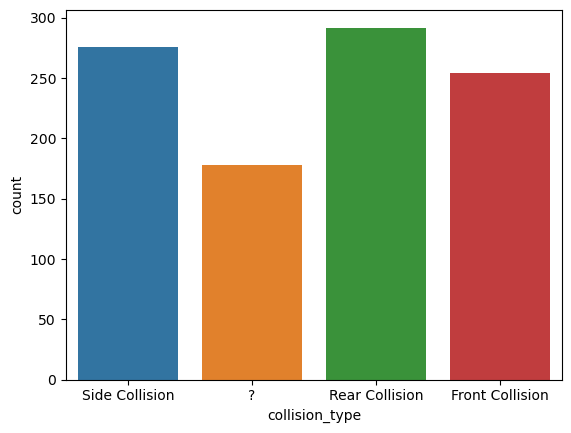

In [54]:
# vehicle theft and parked car count is less and single and multi collision count is higher
# visualise count of collision_type
ax=sns.countplot(x='collision_type',data=df)
print(df['collision_type'].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


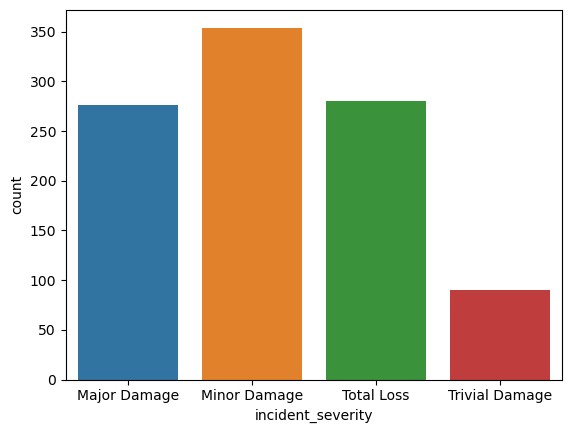

In [55]:
# unknown (?) count is less and rear collision count is higher
# visualise count of incident_severity
ax=sns.countplot(x='incident_severity',data=df)
print(df['incident_severity'].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


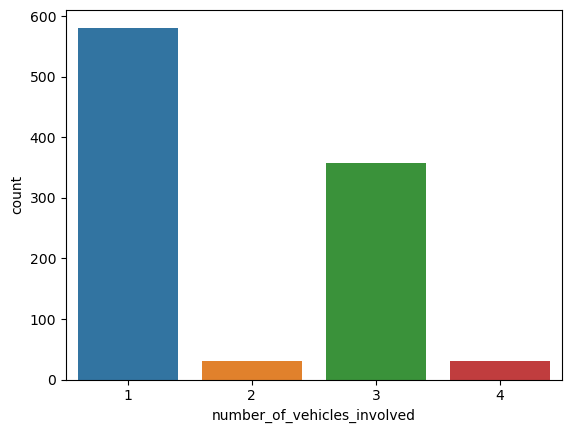

In [56]:
# trivial damage count less and minor damage count higher
# visualise count of number_of_vehicles_involved
ax=sns.countplot(x='number_of_vehicles_involved',data=df)
print(df['number_of_vehicles_involved'].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


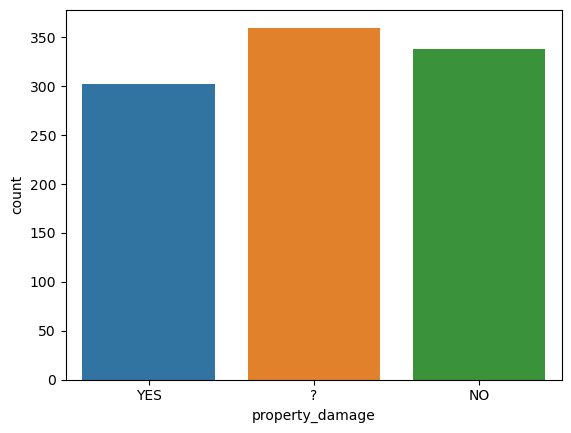

In [57]:
# number_of_vehicles_involved count 2 is less and number_of_vehicles_involved 1 count is higher
# visualise count of property_damage
ax=sns.countplot(x='property_damage',data=df)
print(df['property_damage'].value_counts())

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


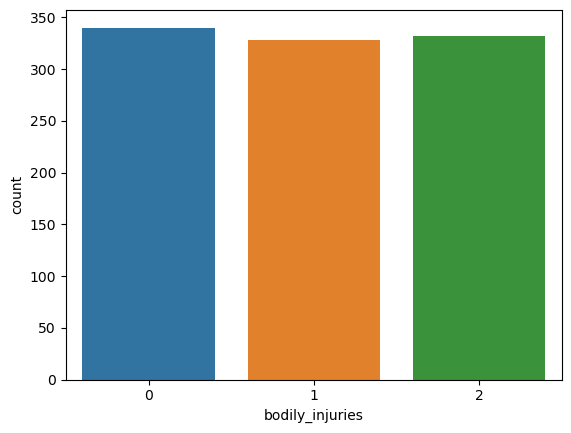

In [58]:
# unknown damage  count high and  proprty damage count is high
# visualise count of bodily_injuries
ax=sns.countplot(x='bodily_injuries',data=df)
print(df['bodily_injuries'].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


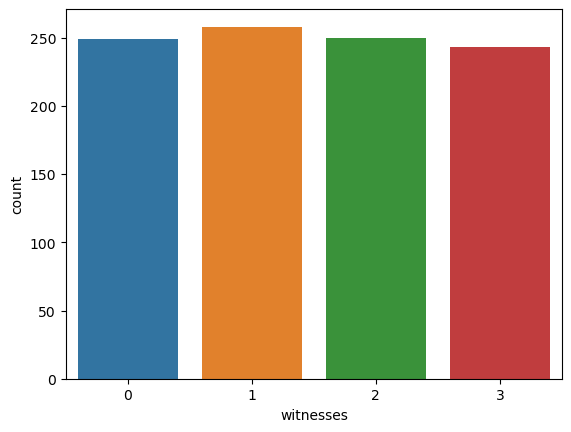

In [59]:
# bodily injuries count is same for 0,1 and 2
# visualise count of witnesses
ax=sns.countplot(x='witnesses',data=df)
print(df['witnesses'].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


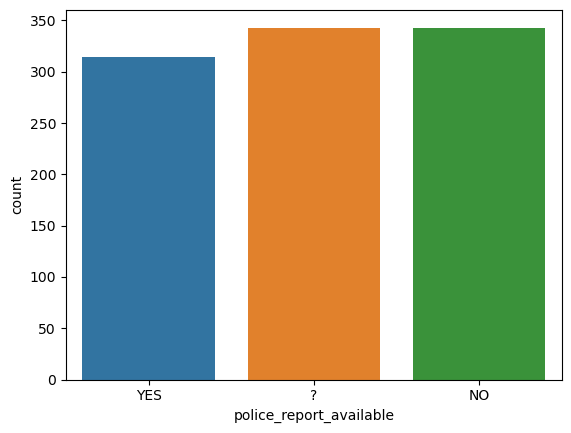

In [60]:
# witness 1 count is higher 
# visualise count of police_report_available
ax=sns.countplot(x='police_report_available',data=df)
print(df['police_report_available'].value_counts())


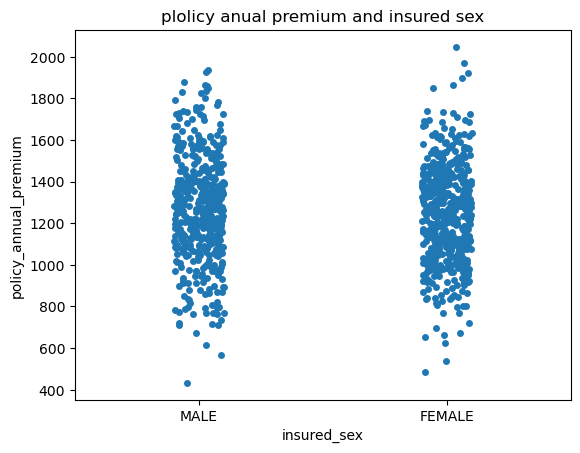

In [61]:
# compare relalion    between policy_annual_premium ',data=dfand insured sex
plt.title('plolicy anual premium and insured sex')
sns.stripplot(x='insured_sex',y='policy_annual_premium',data=df)
plt.show()

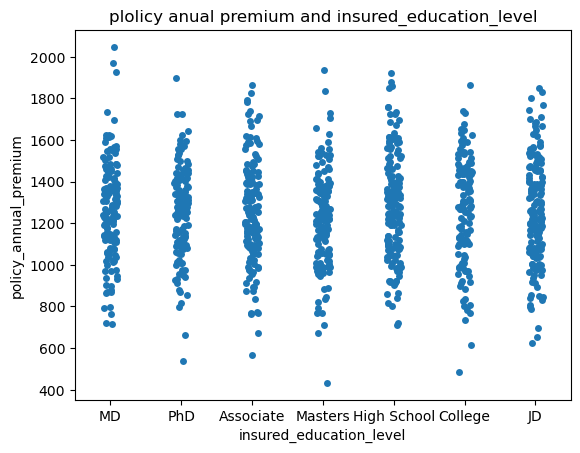

In [62]:
# compare relalion    between policy_annual_premium ', and 
plt.title('plolicy anual premium and insured_education_level')
sns.stripplot(x='insured_education_level',y='policy_annual_premium',data=df)
plt.show()

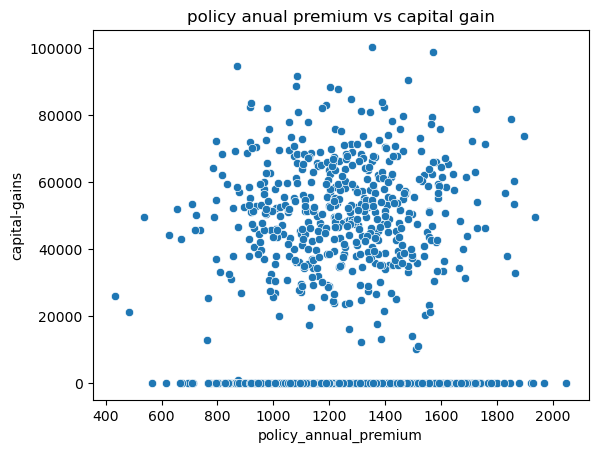

In [63]:
# compare relationship between policy anual premium and capital gain
plt.title('policy anual premium vs capital gain')
sns.scatterplot(x='policy_annual_premium',y='capital-gains',data=df,palette='bright')
plt.show()

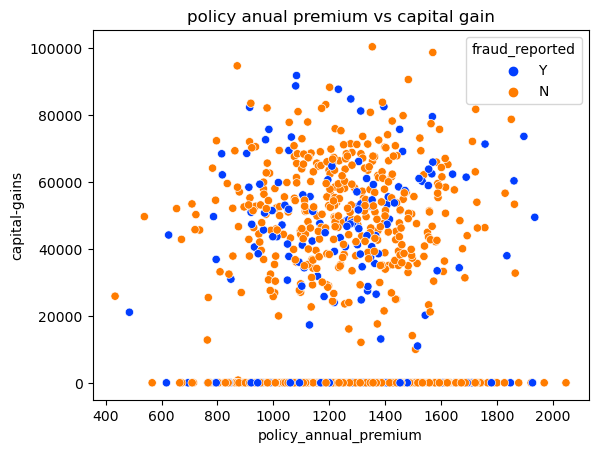

In [64]:
# compare relationship between policy anual premium and capital gain with target
plt.title('policy anual premium vs capital gain')
sns.scatterplot(x='policy_annual_premium',y='capital-gains',hue='fraud_reported',data=df,palette='bright')
plt.show()

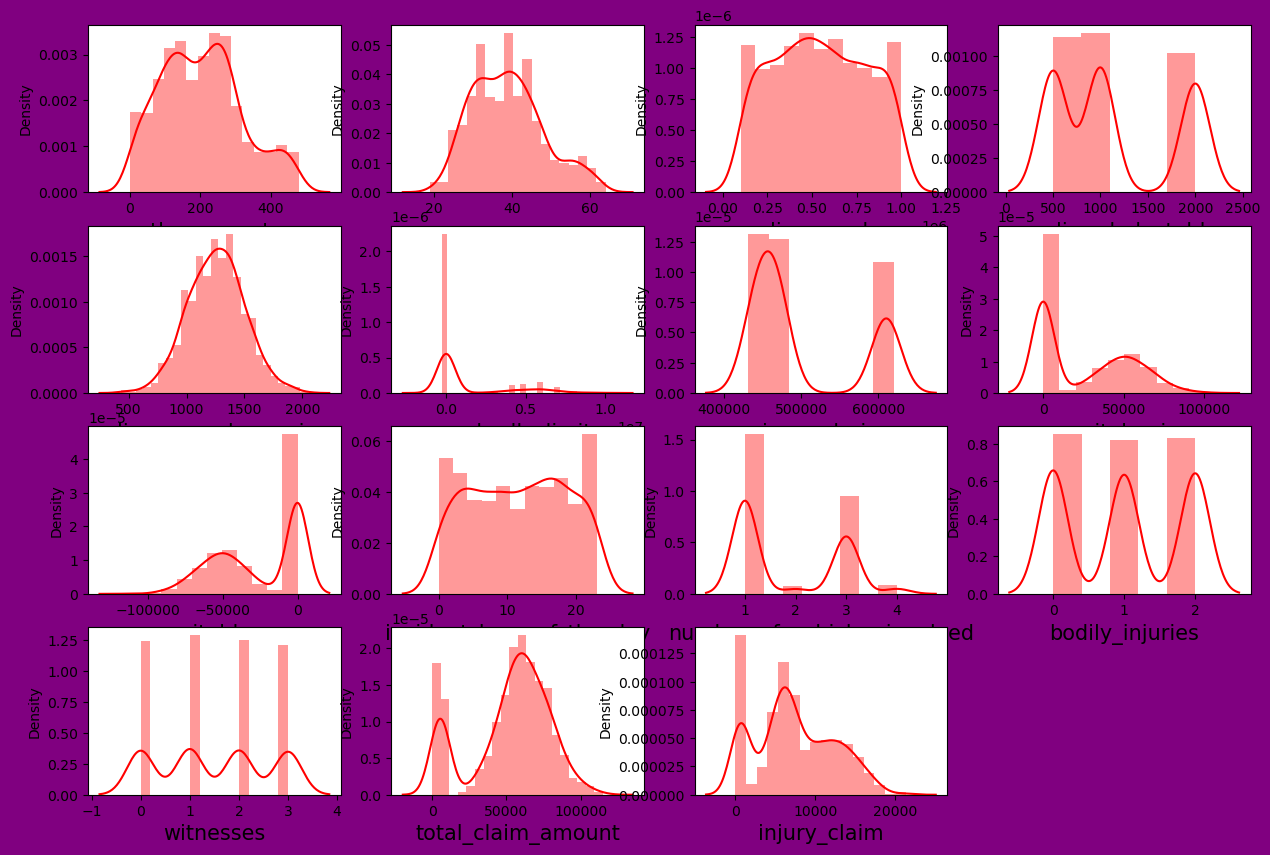

In [112]:
# check normal distribution with distplot
plt.figure(figsize=(15,10),facecolor='purple')
p=1
for columns in contineous_col:
    if p<16:
        plt.subplot(4,4,p)
        sns.distplot(df[columns],color='r')
        plt.xlabel(columns,fontsize=15)
    p+=1
plt.show()

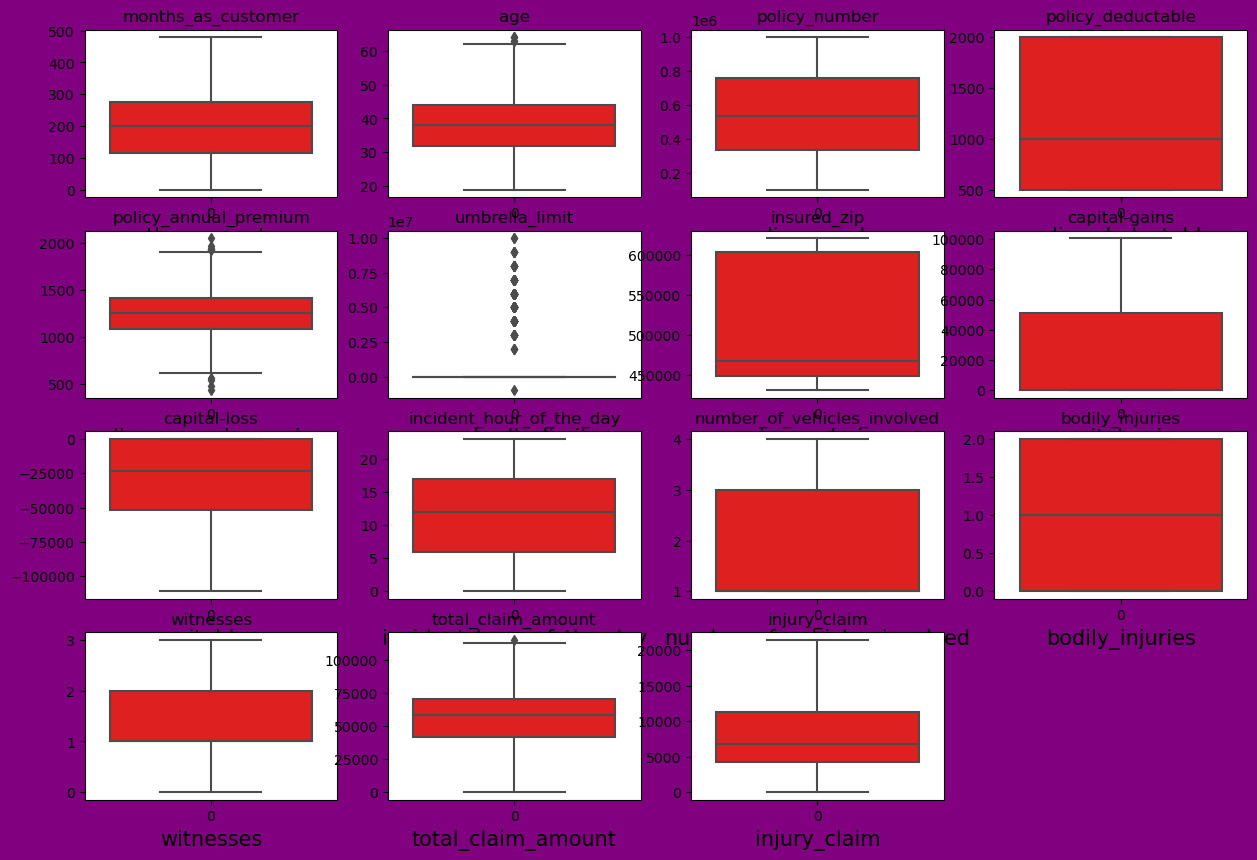

In [113]:
# data looks normally distributed
# check outliers with boxplot
plt.figure(figsize=(15,10),facecolor='purple')
p=1
for columns in contineous_col:
    if p<16:
        plt.subplot(4,4,p)
        sns.boxplot(df[columns],color='r')
        plt.xlabel(columns,fontsize=15)
        plt.title(columns)
    p+=1
plt.show()

In [68]:
# we can delete policy no and date 
df.drop('policy_number',axis=1,inplace=True)

In [69]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [114]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,6,27
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,6,6


In [115]:
# remove outliers using percentile
from numpy import percentile
columns=df[['age','policy_annual_premium','total_claim_amount']]
for i in columns:
    if isinstance(df[i][0],str):
        continue
    else:
        quartiles=percentile(df[i],[25,75])
        lower_level=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_level=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[i]=df[i].apply(lambda x: upper_level if x>upper_level else (lower_level if x < lower_level else x))


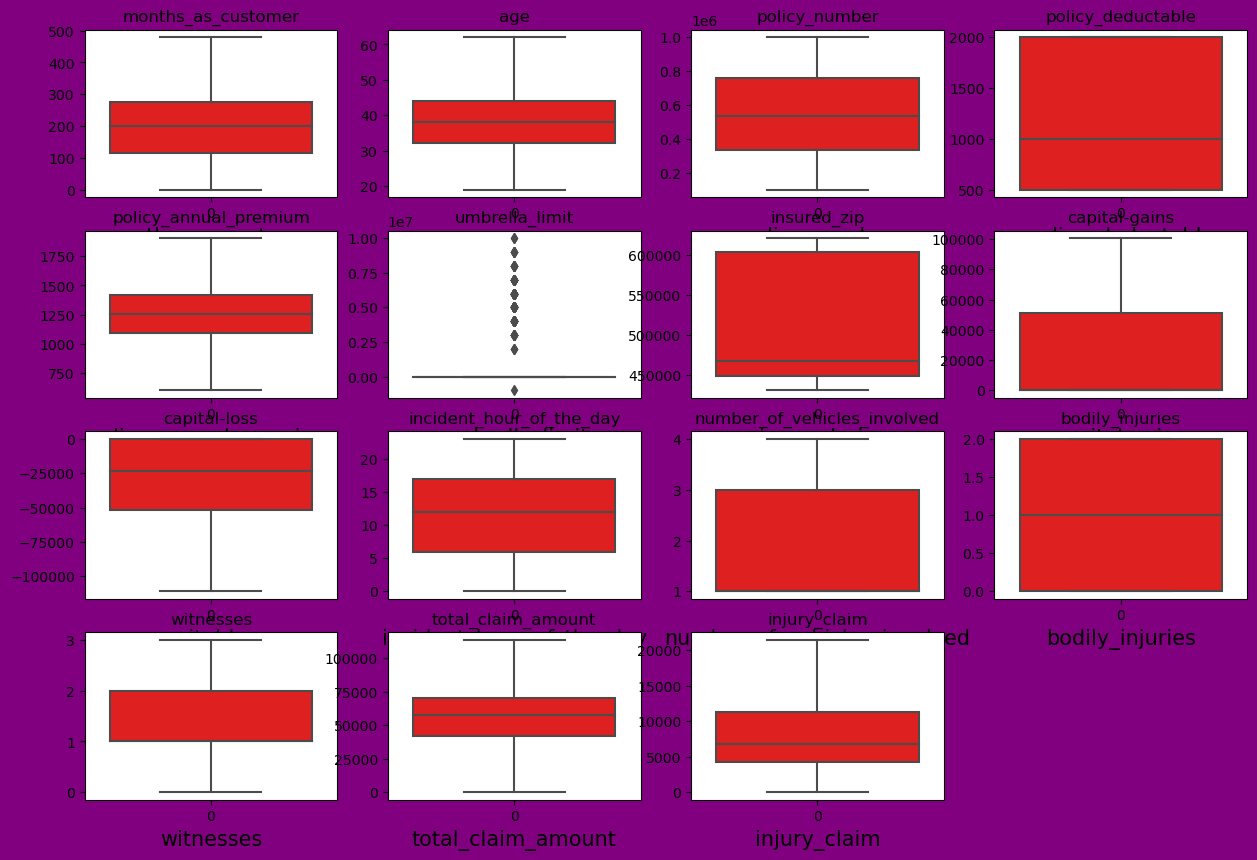

In [118]:
# check outliers with boxplot
plt.figure(figsize=(15,10),facecolor='purple')
#columns=df[['age','policy_annual_premium','total_claim_amount']]
p=1
for columns in contineous_col:
    if p<16:
        plt.subplot(4,4,p)
        sns.boxplot(df[columns],color='r')
        plt.xlabel(columns,fontsize=15)
        plt.title(columns)
    p+=1
plt.show()

In [120]:
# we can delete policy no and date 
df.drop('policy_number',axis=1,inplace=True)


In [121]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [122]:
df.shape

(1000, 39)

In [123]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48.0,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,71610.0,6510,13020,52080,Saab,92x,2004,Y,10,17
1,228,42.0,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,5070.0,780,780,3510,Mercedes,E400,2007,Y,6,27
2,134,29.0,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,34650.0,7700,3850,23100,Dodge,RAM,2007,N,6,9
3,256,41.0,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,63400.0,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25
4,228,44.0,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,6500.0,1300,650,4550,Accura,RSX,2009,N,6,6


In [127]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48.0,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,71610.0,6510,13020,52080,10.0,1.0,2004,1.0,10,17
1,228,42.0,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,5070.0,780,780,3510,8.0,12.0,2007,1.0,6,27
2,134,29.0,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,34650.0,7700,3850,23100,4.0,30.0,2007,0.0,6,9
3,256,41.0,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,63400.0,6340,6340,50720,3.0,34.0,2014,1.0,5,25
4,228,44.0,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,6500.0,1300,650,4550,0.0,31.0,2009,0.0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38.0,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,87200.0,17440,8720,61040,6.0,6.0,2006,0.0,7,16
996,285,41.0,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,108480.0,18080,18080,72320,13.0,28.0,2015,0.0,5,1
997,130,34.0,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,67500.0,7500,7500,52500,11.0,19.0,1996,0.0,2,17
998,458,62.0,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,46980.0,5220,5220,36540,1.0,5.0,1998,0.0,11,18


In [128]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
0,328,48.0,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,71610.0,6510,13020,52080,10.0,1.0,2004,1.0,10,17
1,228,42.0,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,5070.0,780,780,3510,8.0,12.0,2007,1.0,6,27
2,134,29.0,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,34650.0,7700,3850,23100,4.0,30.0,2007,0.0,6,9
3,256,41.0,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,63400.0,6340,6340,50720,3.0,34.0,2014,1.0,5,25
4,228,44.0,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,6500.0,1300,650,4550,0.0,31.0,2009,0.0,6,6


In [129]:
df.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

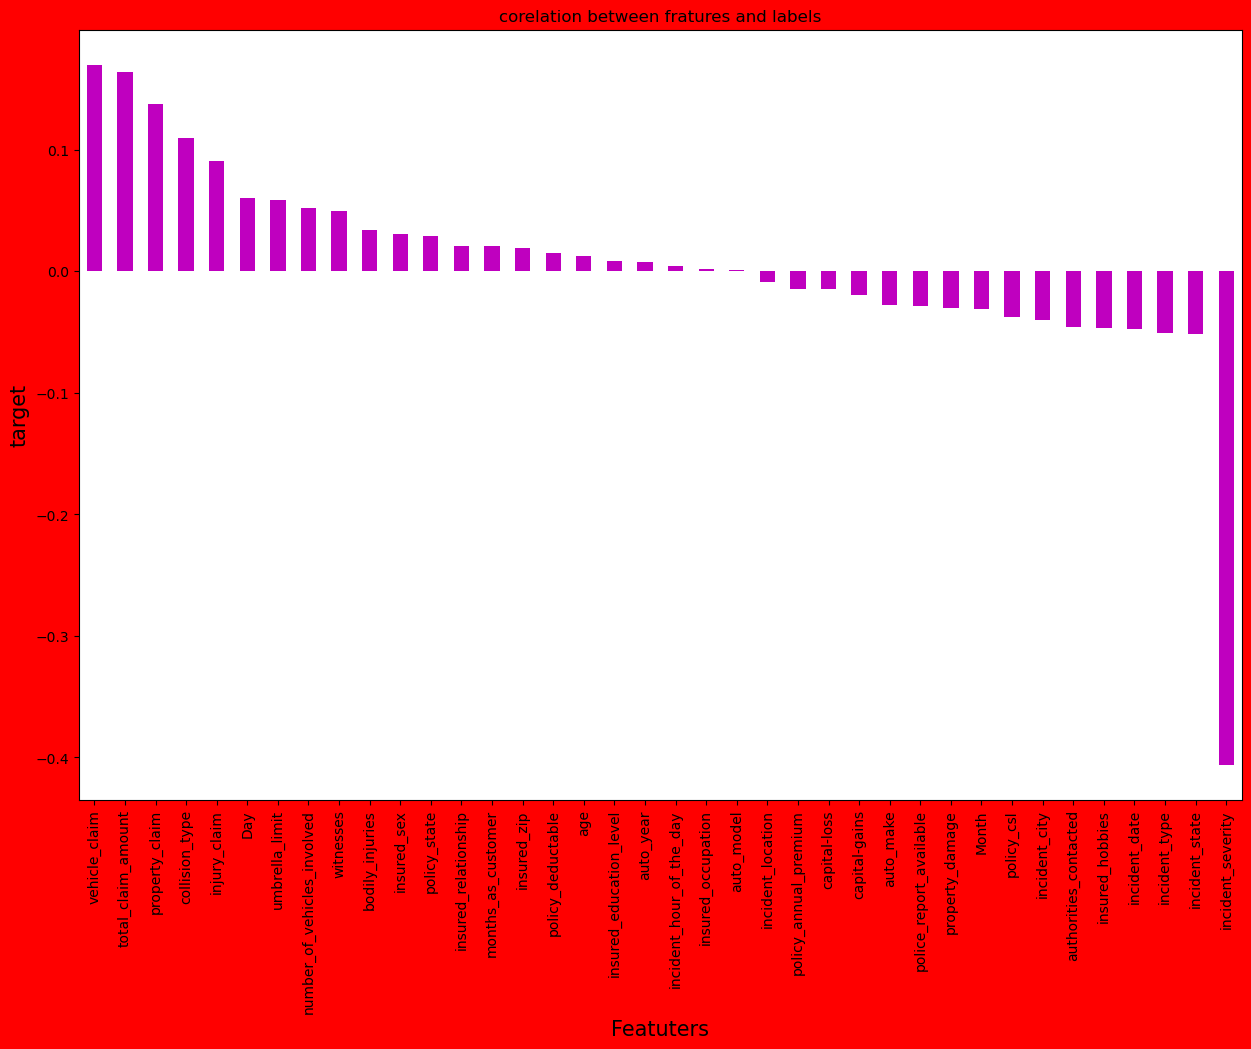

In [130]:
# visualise relationship between features and target
plt.figure(figsize=(15,10),facecolor='red')
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='m')
plt.xlabel('Featuters',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('corelation between fratures and labels')
plt.show()

In [131]:
df.shape

(1000, 39)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   float64
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   float64
 9   insured_education_level      1000 non-null   float64
 10  insured_occupation           1000 non-null   float64
 11  insured_hobbies              1000 non-null   float64
 12  insured_relationship         1000 non-null   float64
 13  capital-gains      

In [133]:
cor=df.corr()

In [134]:
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,Day
months_as_customer,1.000000,0.922143,-0.000328,-0.026819,0.026807,0.003913,0.015498,0.017895,0.060925,-0.000833,...,0.062022,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.005750,0.051728
age,0.922143,1.000000,-0.014547,-0.015251,0.029832,0.013780,0.018186,0.025085,0.073415,0.001015,...,0.070128,0.075887,0.061397,0.062874,0.030579,0.016820,0.001513,0.012287,0.015183,0.053623
policy_state,-0.000328,-0.014547,1.000000,0.001027,0.010033,0.012977,-0.029580,0.008777,-0.020481,-0.034327,...,-0.006055,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.071450,0.002277
policy_csl,-0.026819,-0.015251,0.001027,1.000000,0.003384,0.024641,0.021636,0.006879,-0.010757,0.009153,...,-0.055712,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.045345,0.018973
policy_deductable,0.026807,0.029832,0.010033,0.003384,1.000000,-0.003331,0.010870,0.004545,-0.009733,0.015217,...,0.022780,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.050416,0.009164
policy_annual_premium,0.003913,0.013780,0.012977,0.024641,-0.003331,1.000000,-0.006408,0.034039,0.039999,-0.020051,...,0.006927,-0.019397,-0.012928,0.017968,0.002218,-0.032896,-0.046996,-0.014240,-0.033896,-0.026788
umbrella_limit,0.015498,0.018186,-0.029580,0.021636,0.010870,-0.006408,1.000000,0.019671,0.010688,-0.019357,...,-0.040327,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.009961,-0.045207
insured_zip,0.017895,0.025085,0.008777,0.006879,0.004545,0.034039,0.019671,1.000000,-0.036942,0.016079,...,-0.033947,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,0.015864,-0.039867
insured_sex,0.060925,0.073415,-0.020481,-0.010757,-0.009733,0.039999,0.010688,-0.036942,1.000000,0.009002,...,-0.023689,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.004033,0.040713
insured_education_level,-0.000833,0.001015,-0.034327,0.009153,0.015217,-0.020051,-0.019357,0.016079,0.009002,1.000000,...,0.074255,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808,-0.007118,0.012610


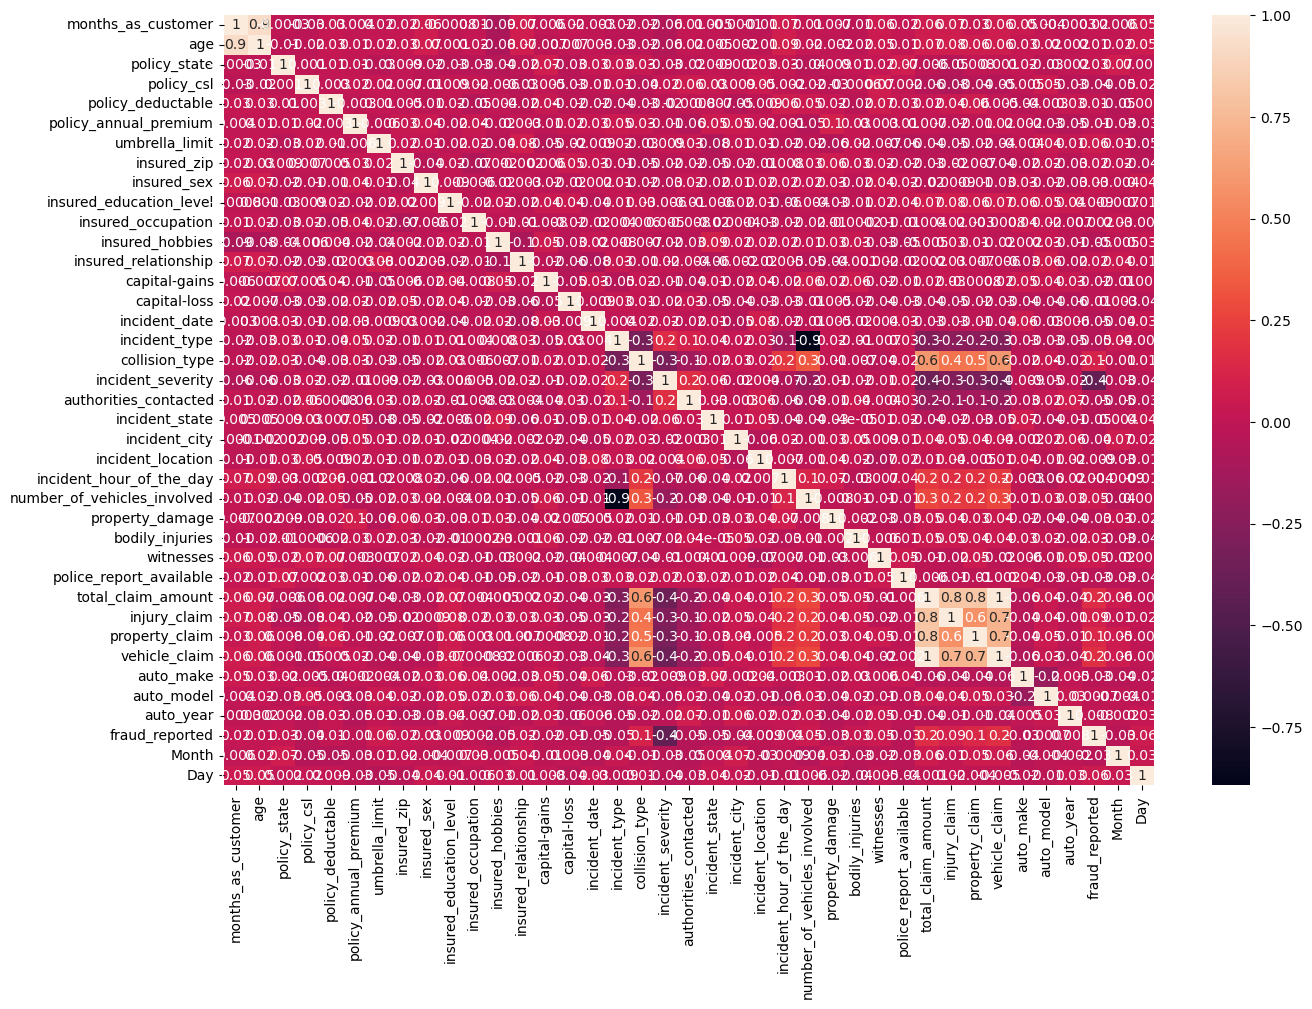

In [135]:
# visualise corelation metrics heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

In [136]:
# devide dataset into features and target
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']


In [137]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [138]:
# lets use vif scaled data
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features']=x.columns

In [139]:
vif

,vif values,features
0,6.849482,months_as_customer
1,6.875896,age
2,1.040271,policy_state
3,1.033729,policy_csl
4,1.040665,policy_deductable
5,1.042799,policy_annual_premium
6,1.032391,umbrella_limit
7,1.037281,insured_zip
8,1.030366,insured_sex
9,1.038889,insured_education_level


In [140]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [141]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features']=x.columns

In [142]:
vif

,vif values,features
0,6.848869,months_as_customer
1,6.867352,age
2,1.038412,policy_state
3,1.032494,policy_csl
4,1.039830,policy_deductable
5,1.042388,policy_annual_premium
6,1.032377,umbrella_limit
7,1.034855,insured_zip
8,1.028960,insured_sex
9,1.038673,insured_education_level


In [143]:
x.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_c

In [144]:
y.value_counts()

0.0    753
1.0    247
Name: fraud_reported, dtype: int64

In [145]:
# here we can see the data is not balanced hence its classification problem we will balance the data using oversampling method
# oversampling method
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [146]:
y1.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

In [ ]:
# we have done the following steps for building a classification M L problem
# import libraries
# do non graphical analysis
# do graphical analysis
# encode categorical column
# check outliers if it present remove it
# check multicolinearity if present revome
# apply features scaling method on numerical features
# apply resampling method to balance the class(classification method)
# also apply features selection methods

In [147]:
# model building 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('best accuracy is ',maxaccu,'at random state ',maxrs)

best accuracy is  0.9271523178807947 at random state  96


In [148]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [149]:
# GradientBoostingclassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_GBC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_GBC))
print("\nclassification report \n\n",classification_report(y_test,pred_GBC))

Accuracy score  0.9271523178807947
confusion matrix 

 [[130  17]
 [  5 150]]

classification report 

               precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       147
         1.0       0.90      0.97      0.93       155

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



In [150]:
# logisticregression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_LR))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_LR))
print("\nclassification report \n\n",classification_report(y_test,pred_LR))

Accuracy score  0.7814569536423841
confusion matrix 

 [[115  32]
 [ 34 121]]

classification report 

               precision    recall  f1-score   support

         0.0       0.77      0.78      0.78       147
         1.0       0.79      0.78      0.79       155

    accuracy                           0.78       302
   macro avg       0.78      0.78      0.78       302
weighted avg       0.78      0.78      0.78       302



In [151]:
# SVC
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
pred_SVM=SVM.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_SVM))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_SVM))
print("\nclassification report \n\n",classification_report(y_test,pred_SVM))

Accuracy score  0.9072847682119205
confusion matrix 

 [[127  20]
 [  8 147]]

classification report 

               precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       147
         1.0       0.88      0.95      0.91       155

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [152]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_RFC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_RFC))
print("\nclassification report \n\n",classification_report(y_test,pred_RFC))

Accuracy score  0.9205298013245033
confusion matrix 

 [[132  15]
 [  9 146]]

classification report 

               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       147
         1.0       0.91      0.94      0.92       155

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



In [153]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ABC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ABC))
print("\nclassification report \n\n",classification_report(y_test,pred_ABC))

Accuracy score  0.8807947019867549
confusion matrix 

 [[129  18]
 [ 18 137]]

classification report 

               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       147
         1.0       0.88      0.88      0.88       155

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [154]:
# BAGGING
from sklearn.ensemble import BaggingClassifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
pred_BAGG=BAGG.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_BAGG))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_BAGG))
print("\nclassification report \n\n",classification_report(y_test,pred_BAGG))

Accuracy score  0.8940397350993378
confusion matrix 

 [[132  15]
 [ 17 138]]

classification report 

               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       147
         1.0       0.90      0.89      0.90       155

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



In [155]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ETC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ETC))
print("\nclassification report \n\n",classification_report(y_test,pred_ETC))

Accuracy score  0.9403973509933775
confusion matrix 

 [[133  14]
 [  4 151]]

classification report 

               precision    recall  f1-score   support

         0.0       0.97      0.90      0.94       147
         1.0       0.92      0.97      0.94       155

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



In [156]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_DT))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_DT))
print("\nclassification report \n\n",classification_report(y_test,pred_DT))

Accuracy score  0.8708609271523179
confusion matrix 

 [[127  20]
 [ 19 136]]

classification report 

               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       147
         1.0       0.87      0.88      0.87       155

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



In [157]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_KNN))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_KNN))
print("\nclassification report \n\n",classification_report(y_test,pred_KNN))

Accuracy score  0.6788079470198676
confusion matrix 

 [[ 54  93]
 [  4 151]]

classification report 

               precision    recall  f1-score   support

         0.0       0.93      0.37      0.53       147
         1.0       0.62      0.97      0.76       155

    accuracy                           0.68       302
   macro avg       0.77      0.67      0.64       302
weighted avg       0.77      0.68      0.64       302



In [160]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBC,x1,y1,cv=5)
print(score)
print(score.mean())
print('accuracy score :',accuracy_score(y_test,pred_GBC))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_GBC)-score.mean()))


[0.75827815 0.8538206  0.90033223 0.94019934 0.91362126]
0.8732503135244549
accuracy score : 0.9271523178807947
deference between accuracy score and cross val score : 0.05390200435633974


In [159]:
score1=cross_val_score(LR,x1,y1,cv=5)
print(score1)
print(score1.mean())
print('accuracy score :',accuracy_score(y_test,pred_LR))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_LR)-score1.mean()))

[0.70860927 0.73754153 0.69435216 0.75415282 0.7807309 ]
0.7350773360322105
accuracy score : 0.7814569536423841
deference between accuracy score and cross val score : 0.04637961761017362


In [161]:
score2=cross_val_score(SVM,x1,y1,cv=5)
print(score2)
print(score2.mean())
print('accuracy score :',accuracy_score(y_test,pred_SVM))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_SVM)-score2.mean()))

[0.82781457 0.81395349 0.86046512 0.9269103  0.90033223]
0.8658951398209058
accuracy score : 0.9072847682119205
deference between accuracy score and cross val score : 0.04138962839101468


In [162]:
score3=cross_val_score(RFC,x1,y1,cv=5)
print(score3)
print(score3.mean())
print('accuracy score :',accuracy_score(y_test,pred_RFC))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_RFC)-score3.mean()))

[0.7615894  0.86046512 0.90697674 0.94684385 0.92358804]
0.8798926316252669
accuracy score : 0.9205298013245033
deference between accuracy score and cross val score : 0.040637169699236475


In [163]:
score4=cross_val_score(ABC,x1,y1,cv=5)
print(score4)
print(score4.mean())
print('accuracy score :',accuracy_score(y_test,pred_ABC))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_ABC)-score4.mean()))

[0.68874172 0.78405316 0.89036545 0.91694352 0.93355482]
0.8427317330751798
accuracy score : 0.8807947019867549
deference between accuracy score and cross val score : 0.038062968911575124


In [164]:
score5=cross_val_score(BAGG,x1,y1,cv=5)
print(score5)
print(score5.mean())
print('accuracy score :',accuracy_score(y_test,pred_BAGG))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_BAGG)-score5.mean()))

[0.82450331 0.82724252 0.87043189 0.9269103  0.88372093]
0.8665617918197619
accuracy score : 0.8940397350993378
deference between accuracy score and cross val score : 0.027477943279575867


In [165]:
score6=cross_val_score(ETC,x1,y1,cv=5)
print(score6)
print(score6.mean())
print('accuracy score :',accuracy_score(y_test,pred_ETC))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_ETC)-score6.mean()))

[0.86092715 0.89036545 0.93687708 0.94352159 0.94684385]
0.9157070251479615
accuracy score : 0.9403973509933775
deference between accuracy score and cross val score : 0.024690325845415972


In [166]:
score7=cross_val_score(DT,x1,y1,cv=5)
print(score7)
print(score7.mean())
print('accuracy score :',accuracy_score(y_test,pred_DT))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_DT)-score7.mean()))

[0.75496689 0.77740864 0.8538206  0.86046512 0.88039867]
0.8254119821346064
accuracy score : 0.8708609271523179
deference between accuracy score and cross val score : 0.04544894501771146


In [167]:
score8=cross_val_score(KNN,x1,y1,cv=5)
print(score8)
print(score8.mean())
print('accuracy score :',accuracy_score(y_test,pred_KNN))
print('deference between accuracy score and cross val score :',(accuracy_score(y_test,pred_KNN)-score8.mean()))

[0.59933775 0.62458472 0.67774086 0.71096346 0.67109635]
0.6567446260808343
accuracy score : 0.6788079470198676
deference between accuracy score and cross val score : 0.022063320939033293


In [ ]:
# BEST PERFORMING MODEL IS KNN BECAUSE THE DEFERENCE BETWEEN ACCURACY SCORE AND CROSS VALIDATION SCORE IS LESS FOR KNN MODEL

In [168]:
# HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV


In [169]:
param_grid={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[10,20,30,40]}

In [172]:
grd_search=GridSearchCV(KNN,param_grid,cv=5,scoring='accuracy')
grd_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [173]:
grd_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [174]:
model=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto',leaf_size=10)

In [175]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('accuracy score :',accuracy_score(y_test,pred)*100)

accuracy score : 71.8543046357616


In [ ]:
# before hyper parameter tuning score is 67.88 ,after hyper parameter tuning accuracy score is 71.85 